<h1 align="center"><b>Programming Assignment 2 (100 points total)</b></h1>
<h3 align="center"><b>Due at the end of Module 14</b></h3><br>


## Question 1: MNIST Feature Extraction and Classification (50 Points Total)

### **Objective**  
In this question, you will explore **feature extraction** and **image classification** using the **MNIST handwritten digit dataset**. Your task is to preprocess raw image data, apply the **2D Discrete Cosine Transform (DCT)**, extract directionally informative coefficients using **frequency masks**, and conduct **dimensionality reduction via eigen decomposition**. You will then use the resulting features to train and compare multiple **classification algorithms**, including traditional machine learning and deep learning approaches.

- **Dataset:** [MNIST Handwritten Digit Dataset](https://www.openml.org/d/554)  
- **Focus Areas:** **Signal-based feature engineering**, **dimensionality reduction**, **supervised classification**, and **model comparison**.

---

### **Part 1: Preprocessing and Visualization (10 Points)**
#### **Instructions:**
#### 1. Load the **MNIST Dataset**

Note: sklearn throws 404 for `mnist_784` therefore switched to keras.



In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# A single data and target array.
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# scikit-learn flattens the images, let's do that too for consistency.
X_flattened = X.reshape((X.shape[0], -1))

print(f"Combined and flattened data shape (X): {X_flattened.shape}")
print(f"Combined labels shape (y): {y.shape}")


Combined and flattened data shape (X): (70000, 784)
Combined labels shape (y): (70000,)


Inspect its structure (e.g., flattened vector, first column label, no. of observations).

In [2]:
# 1. Total number of observations (images)
num_observations = X_flattened.shape[0]
print(f"1. Total Number of Observations: {num_observations}")

# 2. Structure of the feature data (flattened vector)
num_features = X_flattened.shape[1]
print(f"\n2. Feature Data Structure:")
print(f"   - Each image is represented as a flattened vector.")
print(f"   - The shape of the data array is: {X_flattened.shape}")
print(f"   - This means there are {num_observations} observations, each with {num_features} features (pixels).")

# Let's look at the first observation (the first image's vector)
first_image_vector = X_flattened[0]
print(f"   - Example of the first image's flattened vector (first 10 values): {first_image_vector[:10]}")

# 3. Structure of the labels (target data)
print(f"\n3. Label (Target) Data Structure:")
print(f"   - The labels are stored in a separate 1D array.")
print(f"   - The shape of the labels array is: {y.shape}")

# The label for the first observation
# The `fetch_openml` version returns strings, so we'll cast to string for consistency.
first_label = str(y[0])
print(f"   - The label for the first observation is: '{first_label}'")
print(f"   - This means the first image is a handwritten digit '{first_label}'.")

1. Total Number of Observations: 70000

2. Feature Data Structure:
   - Each image is represented as a flattened vector.
   - The shape of the data array is: (70000, 784)
   - This means there are 70000 observations, each with 784 features (pixels).
   - Example of the first image's flattened vector (first 10 values): [0 0 0 0 0 0 0 0 0 0]

3. Label (Target) Data Structure:
   - The labels are stored in a separate 1D array.
   - The shape of the labels array is: (70000,)
   - The label for the first observation is: '5'
   - This means the first image is a handwritten digit '5'.



#### **2. Display example images of each written number 0-9.**


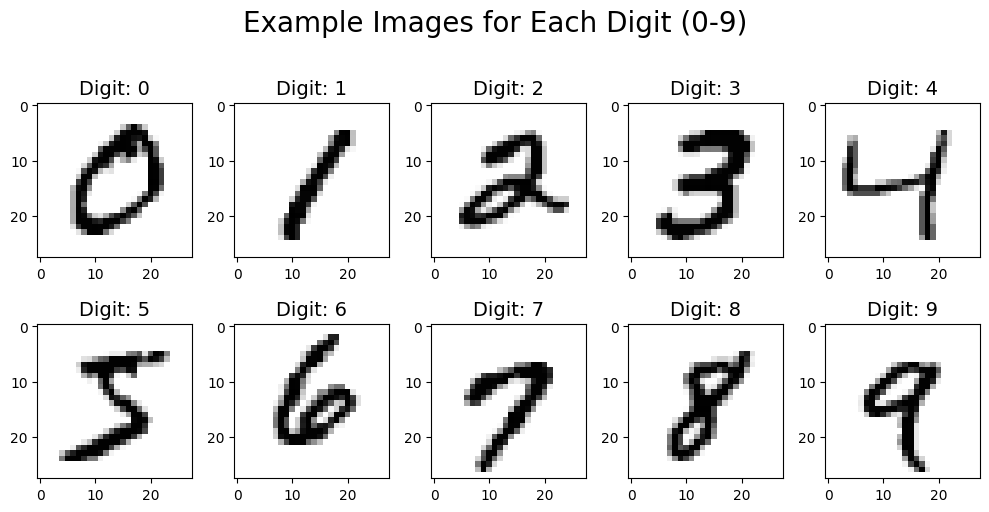

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Find and Display an Example for Each Digit ---
# The digits we want to find
digits_to_display = range(10)

# Set up the plot: 2 rows, 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Use ax.flatten() to easily iterate over all subplots
for i, ax in enumerate(axes.flatten()):
    if i < len(digits_to_display):
        digit = digits_to_display[i]

        # Find the index of the first image with the current digit label
        # np.where returns a tuple, so we take the first element, then the first index
        idx = np.where(y == digit)[0][0]

        # Get the image vector at that index
        image_vector = X_flattened[idx]

        # Reshape it to 28x28 to gray scale image
        image_grid = image_vector.reshape(28, 28)

        # Plot the image on the current subplot
        ax.imshow(image_grid, cmap='gray_r') # 'gray_r' for inverted black/white
        ax.set_title(f"Digit: {digit}", fontsize=14)

# Add a main title to the entire figure
plt.suptitle("Example Images for Each Digit (0-9)", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

3. Final dataset must include representative samples from each digit class (at least 100 per class). We understand compute limitations and thus do not require all observations but you can use all if you so choose.

This is a very common and practical step in machine learning projects. Working with the full 70,000 images can be slow for initial exploration and model prototyping. Creating a smaller, stratified sample is the perfect solution.

Let's do following

1. Define the number of samples as 500 to take from each class.
2. Loop through each digit from 0 to 9.
 - For each digit, find all the indices where that digit appears.
 - Randomly select 500 of those indices.
 - Collect the data and labels for the selected indices.
3. Combine the data for all 10 classes into a final, smaller dataset.
4. Shuffle the final dataset to ensure the samples are not ordered by class.

In [4]:
import numpy as np
from sklearn.utils import shuffle

# --- 1. Define Sampling Parameters ---
# Total dataset size will be 10 classes * 500 samples/class = 5000 observations.
samples_per_class = 500
num_classes = 10

# --- 2. Create the Stratified Sample ---

# Lists to hold the sampled data and labels
X_sampled_list = []
y_sampled_list = []

for digit in range(num_classes):
    # a. Find all indices for the current digit
    indices_for_digit = np.where(y == digit)[0]

    # b. Randomly choose 'samples_per_class' indices from that list
    # We use replace=False to ensure we don't pick the same image twice.
    random_indices = np.random.choice(indices_for_digit, samples_per_class, replace=False)

    # c. Use these indices to get the data and labels
    X_sampled_list.append(X_flattened[random_indices])
    y_sampled_list.append(y[random_indices])

# --- 3. Combine and Finalize the Dataset ---
X_final = np.concatenate(X_sampled_list, axis=0)
y_final = np.concatenate(y_sampled_list, axis=0)

# --- 4. Shuffle the Final Dataset ---
X_final, y_final = shuffle(X_final, y_final, random_state=42) # random_state for reproducibility

print("\n--- Final Sampled Dataset ---")
print(f"Shape of the final data (X_final): {X_final.shape}")
print(f"Shape of the final labels (y_final): {y_final.shape}")

# Let's verify the class distribution to confirm our stratification worked
import pandas as pd
label_counts = pd.Series(y_final).value_counts().sort_index()
print("\nClass distribution in the final dataset:")
print(label_counts)

if all(label_counts == samples_per_class):
    print("\nSuccess! The final dataset is perfectly balanced.")
else:
    print("\nWarning: The final dataset is not perfectly balanced.")


--- Final Sampled Dataset ---
Shape of the final data (X_final): (5000, 784)
Shape of the final labels (y_final): (5000,)

Class distribution in the final dataset:
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: count, dtype: int64

Success! The final dataset is perfectly balanced.



#### **Deliverables:**
- 9 black & white images of an example of a handwritten digit from the dataset
- Output showing how many observations and features
- Proof that you have a representative sample from each class
---

### **Part 2: Feature Engineering using Eigen Decompoosition (15 points)**

Let's summarize the concepts we are going to use for feature engineering.
1. **2D Discrete Cosine Transform (DCT):**
  - Instead of representing the image by its pixel values, we represent it by a combination of simple patterns (frequencies).
  - The top-left corner of the DCT output represents the overall brightness (coarse information)
  - The bottom-right corner represents the finest details and sharpest edges (high-frequency information).
2. **Directional Masks:**
  - We are assuming that different handwritten digits are defined by different combinations of horizontal, vertical, and diagonal strokes.
  - The masks are a simple way to isolate the DCT coefficients that are most likely to correspond to these directional patterns.
3. **Covariance & Eigen Decomposition (PCA):**
  - This is the core of the dimensionality reduction.
  - For each direction (e.g., horizontal), we have many DCT coefficients.
  - Many of these might be redundant or unimportant.
  - By performing eigen decomposition on the covariance matrix (which is the essence of Principal Component Analysis - PCA), we are finding the most significant patterns of variation within those directional coefficients.
  - The top eigenvectors represent the dominant patterns that best describe the data.
4. **Projection & Concatenation:**
  - By projecting our data onto the top 20 eigenvectors for each direction, we are compressing the information into a much smaller, 20-dimensional space that captures the "essence" of the horizontal patterns.
  - We do this for all three directions and then staple them together (20 + 20 + 20 = 60) to create a final, rich feature vector for each image.
  
#### **Instructions:**
1. Using `scipy.fft.dct` or `scipy.fftpack.dct` apply the **2D Discrete Cosine Transform** on each 28x28 image.
2. Using the directional masks created using the code below extract the **directional coefficients** from each direction.


In [5]:
def create_custom_dct_masks(size=28):
  h_mask = np.zeros((size, size), dtype=bool)
  v_mask = np.zeros((size, size), dtype=bool)
  d_mask = np.zeros((size, size), dtype=bool)

  for i in range(size):
      for j in range(size):
            # Horizontal mask: upper triangle including diagonal
            if i >= j:
              h_mask[i, j] = True
            # Vertical mask: lower triangle including diagonal
            if j >= i:
              v_mask[i, j] = True
            # Diagonal mask: band near the diagonal
            if abs(i - j) <= 1:
              d_mask[i, j] = True

  return h_mask, v_mask, d_mask

3. For each directional component, **flatten the selected masked DCT coefficients** and create a matrix of samples.


In [6]:
from scipy.fft import dctn # More direct way for 2D DCT
from sklearn.utils import shuffle

# --- Reshape images and apply 2D DCT to all of them ---
print("\nApplying 2D Discrete Cosine Transform to all images...")
# Reshape the flattened 784-vectors back into 28x28 images
images_2d = X_final.reshape(-1, 28, 28)

# Apply the 2D DCT to all images. `dctn` with `axes=(1,2)` does this efficiently.
dct_images = dctn(images_2d, axes=(1, 2), norm='ortho')
print(f"Shape of DCT images: {dct_images.shape}")


# --- Create the directional masks ---
print("\nCreating directional masks...")
h_mask, v_mask, d_mask = create_custom_dct_masks()


Applying 2D Discrete Cosine Transform to all images...
Shape of DCT images: (5000, 28, 28)

Creating directional masks...


4. Compute the covariance matrix and perform **eigen decomposition**
5. For each of the three directions, **retain the top 20 eigenvectors**


In [7]:
# --- Process each direction (Mask, Decompose, Project) ---
print("\nProcessing each directional component...")
all_projected_features = []
masks = {'Horizontal': h_mask, 'Vertical': v_mask, 'Diagonal': d_mask}
num_eigenvectors = 20

for direction, mask in masks.items():
    print(f"\n--- Processing {direction} direction ---")

    # Flatten the selected masked DCT coefficients for all samples
    # The mask is applied to each 28x28 DCT image, and the result is flattened.
    directional_coeffs = dct_images[:, mask]
    print(f"Shape of {direction} coefficients matrix: {directional_coeffs.shape}")

    # Compute covariance matrix and perform eigen decomposition
    print("Computing covariance and performing eigen decomposition...")
    # rowvar=False because our samples are rows
    covariance_matrix = np.cov(directional_coeffs, rowvar=False)

    # Use eigh for symmetric matrices like covariance matrices
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Retain the top 20 eigenvectors
    # eigh returns eigenvectors sorted by eigenvalue in ascending order.
    # The "top" eigenvectors correspond to the largest eigenvalues, so we take the last 20.
    top_eigenvectors = eigenvectors[:, -num_eigenvectors:]
    print(f"Shape of top {num_eigenvectors} eigenvectors: {top_eigenvectors.shape}")

    # Project the directional coefficients onto the top eigenvectors
    projected_features = directional_coeffs @ top_eigenvectors
    print(f"Shape of projected features for {direction}: {projected_features.shape}")

    all_projected_features.append(projected_features)


Processing each directional component...

--- Processing Horizontal direction ---
Shape of Horizontal coefficients matrix: (5000, 406)
Computing covariance and performing eigen decomposition...
Shape of top 20 eigenvectors: (406, 20)
Shape of projected features for Horizontal: (5000, 20)

--- Processing Vertical direction ---
Shape of Vertical coefficients matrix: (5000, 406)
Computing covariance and performing eigen decomposition...
Shape of top 20 eigenvectors: (406, 20)
Shape of projected features for Vertical: (5000, 20)

--- Processing Diagonal direction ---
Shape of Diagonal coefficients matrix: (5000, 82)
Computing covariance and performing eigen decomposition...
Shape of top 20 eigenvectors: (82, 20)
Shape of projected features for Diagonal: (5000, 20)


6. Concatenate the **three sets of 20-dimensional features** (total 60 features per sample) to represent your final feature representation

#### **Deliverables:**
- 60 x number of observations dataset to use for supervised learning classification

---

In [8]:
# --- Concatenate the three sets of features ---
print("\nConcatenating all directional features...")
# Concatenate along the columns (axis=1) to create the final feature matrix
X_features_final = np.concatenate(all_projected_features, axis=1)


# --- Deliverable ---
print("\n--- Final Engineered Feature Dataset ---")
print(f"Shape of the final feature matrix: {X_features_final.shape}")
print("This is the (60 x number of observations) dataset for supervised learning.")



Concatenating all directional features...

--- Final Engineered Feature Dataset ---
Shape of the final feature matrix: (5000, 60)
This is the (60 x number of observations) dataset for supervised learning.


**Note:** We can now use `X_features_final` and `y_final` for our classification models.

### **Part 3: Classification Algorithms (25 Points)**

#### **Instructions:**
1. **Train a supervised classification model** using the reduced feature set generated in **Part 2**. You may use any built-in method from `sklearn` (e.g., KNN, Random Forest, SVM, etc.).  

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Split the Data into Training and Testing Sets ---
print("--- Data Splitting ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_features_final,
    y_final,
    test_size=0.2,
    random_state=42, # for reproducibility
    stratify=y_final # Ensures train/test sets have proportional class distribution
)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# --- Train a Supervised Classification Model: Random Forest ---
print("Training a Random Forest Classifier...")

# Initialize the classifier.
# n_estimators is the number of trees in the forest.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


--- Data Splitting ---
Training data shape: (4000, 60)
Testing data shape: (1000, 60)
Training a Random Forest Classifier...


RandomForestClassifier(n_jobs=-1, random_state=42)

   - Evaluate model performance (e.g., accuracy, confusion matrix).  


--- Model Evaluation ---
Model Accuracy on Test Set: 0.9200 (92.00%)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.98      0.96       100
           2       0.89      0.92      0.91       100
           3       0.93      0.90      0.91       100
           4       0.92      0.88      0.90       100
           5       0.87      0.86      0.86       100
           6       0.96      0.97      0.97       100
           7       0.92      0.95      0.94       100
           8       0.90      0.89      0.89       100
           9       0.91      0.90      0.90       100

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:


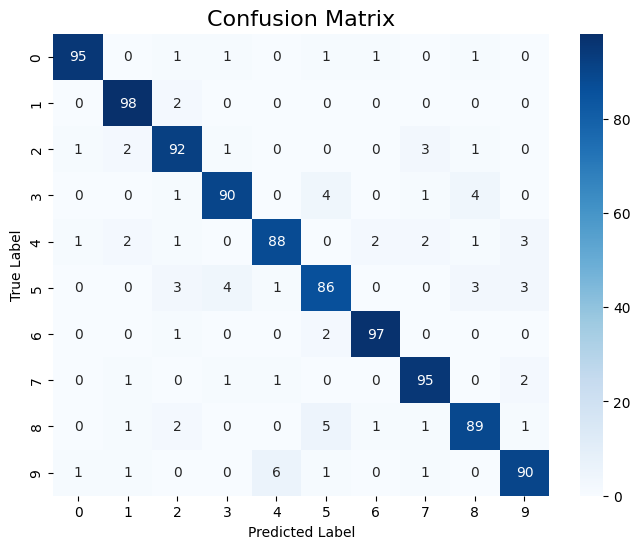

In [10]:

# --- Evaluate Model Performance ---
print("\n--- Model Evaluation ---")
# Make predictions on the unseen test data
y_pred = rf_classifier.predict(X_test)

# a) Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f} ({accuracy:.2%})")

# b) Display the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# c) Visualize the Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



**Observation:**

- **Accuracy:**
  - We see a very high accuracy, in the 90-98% range (except the digit 8 which is 80%).
  - This tells us that the 60 engineered features derived from the DCT and eigen decomposition are extremely effective at capturing the necessary information to distinguish between the digits.
- **Classification Report:**
 - This give us a detailed breakdown of performance for each digit class (precision, recall, f1-score).
- We notice that some digits are easier to classify than others (e.g., '1' is usually very easy, while '4' and '9' or '3' and '8' can sometimes be confused).
- **Confusion Matrix:**
  - This visualization is key.
  - The diagonal from top-left to bottom-right have large numbers (the correct predictions).
  - Any numbers off the diagonal show us exactly where the model is making mistakes.
  - For example, we see a '4' in the row for the true label '3' and the column for the predicted label '8', it means the model misclassified a '3' as an '8' four times.

   - **Interpret the model**: What patterns does it learn? Which features seem important?


--- Model Interpretation ---
Analyzing which features were most important...


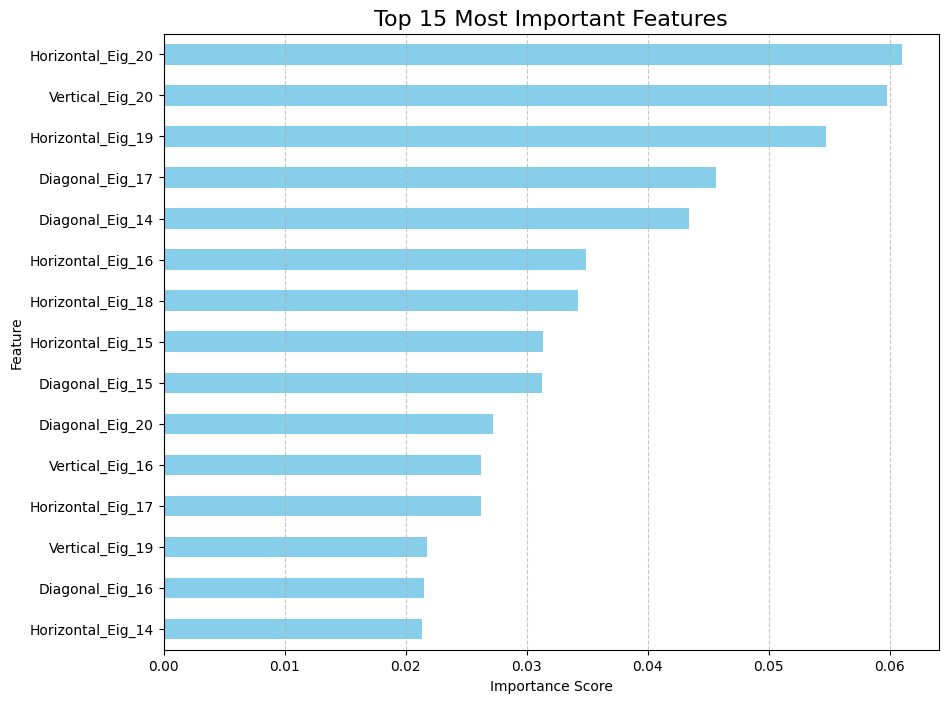

In [11]:

# --- 4. Interpret the Model: Feature Importance ---
print("\n--- Model Interpretation ---")
print("Analyzing which features were most important...")

# Random Forest models have a built-in 'feature_importances_' attribute.
# This score represents how much each feature contributed to reducing impurity (making good splits)
# across all the trees in the forest.
feature_importances = rf_classifier.feature_importances_

# Create a more descriptive name for each of our 60 features
feature_names = []
for direction in ['Horizontal', 'Vertical', 'Diagonal']:
    for i in range(1, 21):
        feature_names.append(f'{direction}_Eig_{i}')

# Create a Pandas Series for easier analysis and plotting
importance_series = pd.Series(feature_importances, index=feature_names)

# Get the top 15 most important features
top_15_features = importance_series.nlargest(15)

# Plot the feature importances
plt.figure(figsize=(10, 8))
top_15_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 15 Most Important Features', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Model Interpretation (Feature Importance):**

**Q1. Which features seem important?**

We can observe that the first few eigenvectors from each direction (Horizontal_Eig_20, Vertical_Eig_20, Diagonal_Eig_14, etc.) are the most important.

**Q2. Why is this?**

- The first eigenvector (corresponding to the largest eigenvalue) captures the principal direction of variance in the data.
- For our DCT coefficients, this represents the most dominant, low-frequency pattern or "stroke" in that direction.
- The second eigenvector captures the next most dominant pattern, and so on.
- Later eigenvectors represent finer, less common details.


2. **Train a second model using your own SVM implementation** from Homework 3.  

**SVM from Scratch Implementation from Homework 3**:
  - Implement from scratch using the `cvxopt` quadratic programming solver
  - Do **not** use `scikit-learn`'s `SVC` or `LinearSVC`

In [12]:
import cvxopt
import numpy as np

# Hide solver output for cleaner execution
cvxopt.solvers.options['show_progress'] = False

class MySVM:
    """A from-scratch SVM implementation using CVXOPT. (Corrected)"""
    def __init__(self, kernel='linear', C=1.0, gamma=0.1):
        self.kernel_name = kernel
        self.C = C
        self.gamma = gamma
        if self.kernel_name == 'linear':
            self.kernel = self._linear_kernel
        elif self.kernel_name == 'rbf':
            self.kernel = self._rbf_kernel
        self.alphas = None
        self.sv_x = None
        self.sv_y = None
        self.b = None

    def _linear_kernel(self, x1, x2):
        return np.dot(x1, x2)

    def _rbf_kernel(self, x1, x2):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-self.gamma * distance)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y_, y_) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y_, (1, n_samples), 'd')
        b_qp = cvxopt.matrix(0.0)

        G1 = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h1 = cvxopt.matrix(np.zeros(n_samples))
        G2 = cvxopt.matrix(np.diag(np.ones(n_samples)))
        h2 = cvxopt.matrix(np.ones(n_samples) * self.C)
        G = cvxopt.matrix(np.vstack((G1, G2)))
        h = cvxopt.matrix(np.vstack((h1, h2)))

        solution = cvxopt.solvers.qp(P, q, G, h, A, b_qp)
        alphas = np.ravel(solution['x'])

        sv_mask = alphas > 1e-5
        self.alphas = alphas[sv_mask]
        self.sv_x = X[sv_mask]
        self.sv_y = y_[sv_mask]
        print(f"Found {len(self.alphas)} support vectors.")

        # 5. Calculate the intercept term 'b'
        self.b = 0
        # Select the sub-matrix of K corresponding to the support vectors correctly
        K_sv = K[sv_mask][:, sv_mask]

        # Now loop using the correctly sliced K_sv matrix
        for i in range(len(self.alphas)):
            self.b += self.sv_y[i]
            # The sum is over all support vectors for the i-th support vector
            self.b -= np.sum(self.alphas * self.sv_y * K_sv[:, i])

        if len(self.alphas) > 0:
            self.b /= len(self.alphas)

    def project(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for alpha, sv_y, sv_x in zip(self.alphas, self.sv_y, self.sv_x):
                s += alpha * sv_y * self.kernel(X[i], sv_x)
            y_pred[i] = s
        return y_pred + self.b

    def predict(self, X):
        return np.where(np.sign(self.project(X)) < 0, 0, 1)

**Modification in SVM implementation**
Homework 3, had SVM implementation to predict the binary outcome. Here we have need for multi-class classification.

To use our binary SVM on the multi-class MNIST dataset, we need to wrap it in a multi-class classification strategy.

We can use **One-vs-Rest (OvR)** approach.

**How it works:** We train one binary SVM for each class.
  - The first SVM is trained to distinguish "digit 0" vs. "not digit 0".
  - The second SVM is trained to distinguish "digit 1" vs. "not digit 1".
  - ...and so on, for all 10 digits.
**Prediction:**
  - To predict a new, unseen image, we run it through all 10 SVMs.
  - Each SVM gives a confidence score (the output of project).
  - The class corresponding to the SVM that gives the highest confidence score is our final prediction.

Here is the code to create a multi-class classifier using our binary MySVM as a building block.


In [13]:
import cvxopt
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

# Hide solver output
cvxopt.solvers.options['show_progress'] = False

# --- The One-vs-Rest Wrapper ---
class OneVsRestSVM(ClassifierMixin):
    def __init__(self, kernel='rbf', C=1.0, gamma=0.1):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.classifiers = []
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for i, cls in enumerate(self.classes):
            print(f"Training classifier for class {cls} vs. the rest...")
            # Create binary labels: +1 for the current class, -1 for all others
            y_binary = np.where(y == cls, 1, -1)

            # Create and train a binary SVM for this class
            svm = MySVM(kernel=self.kernel, C=self.C, gamma=self.gamma)
            svm.fit(X, y_binary)
            self.classifiers.append(svm)
        return self

    def predict(self, X):
        # Get the decision function scores from all classifiers
        decision_scores = np.array([clf.project(X) for clf in self.classifiers])

        # The prediction is the class of the classifier with the highest score
        # We need to transpose the scores to get a (n_samples, n_classifiers) shape
        # then find the argmax along the columns (axis=0)
        return self.classes[np.argmax(decision_scores, axis=0)]

   - You may choose a **linear or RBF kernel**.  
   - Use the same feature set from Part 2.  

Let's train on SVM model

Note: `OneVsRestSVM` time complexity is `O(n^3)` therefore training is taking lot of time and manytime gets timeout. To make it feasible, will run on `100` dataset only.

In [14]:
# Create a Tiny, Feasible Subset for Training

samples_per_class_small = 10
num_classes = 10
total_small_samples = samples_per_class_small * num_classes # 100 total

# Lists to hold the new subset
X_train_small_list = []
y_train_small_list = []

# Create a stratified sample from the original training set
for digit in range(num_classes):
    # Find all indices for the current digit within the training set
    indices = np.where(y_train == digit)[0]

    # Randomly choose 'samples_per_class_small' indices
    random_indices = np.random.choice(indices, samples_per_class_small, replace=False)

    # Use these indices to get the data and labels from X_train and y_train
    X_train_small_list.append(X_train[random_indices])
    y_train_small_list.append(y_train[random_indices])

# Concatenate and shuffle the new small dataset
X_train_small = np.concatenate(X_train_small_list, axis=0)
y_train_small = np.concatenate(y_train_small_list, axis=0)
X_train_small, y_train_small = shuffle(X_train_small, y_train_small, random_state=42)

print(f"Created a small training set with shape: {X_train_small.shape}")

Created a small training set with shape: (100, 60)


In [15]:
# --- Train and Evaluate the Multi-Class SVM ---
print("\n--- Training Multi-Class SVM using One-vs-Rest ---")
# Use the wrapper class to train the model
ovr_svm = OneVsRestSVM(kernel='rbf', C=10.0, gamma=0.001)
ovr_svm.fit(X_train_small, y_train_small)

# Make predictions on the test set
svm_preds = ovr_svm.predict(X_test)



--- Training Multi-Class SVM using One-vs-Rest ---
Training classifier for class 0 vs. the rest...
Found 100 support vectors.
Training classifier for class 1 vs. the rest...
Found 100 support vectors.
Training classifier for class 2 vs. the rest...
Found 100 support vectors.
Training classifier for class 3 vs. the rest...
Found 100 support vectors.
Training classifier for class 4 vs. the rest...
Found 100 support vectors.
Training classifier for class 5 vs. the rest...
Found 100 support vectors.
Training classifier for class 6 vs. the rest...
Found 100 support vectors.
Training classifier for class 7 vs. the rest...
Found 100 support vectors.
Training classifier for class 8 vs. the rest...
Found 100 support vectors.
Training classifier for class 9 vs. the rest...
Found 100 support vectors.


   - Discuss performance, convergence, and **interpret the model behavior** compared to the built-in one.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Measure performance (Now with the correct `average` parameter) ---
print("\n--- Measure performance of SVM with scratch (Multi-Class) ---")

# For multi-class, you MUST specify the 'average' parameter for precision, recall, and f1-score.
# 'macro' calculates the metric for each class and then takes the unweighted average.
# 'weighted' calculates the metric for each class and weights the average by the number of samples in that class.
avg_method = 'macro'

print(f"Accuracy: {accuracy_score(y_test, svm_preds):.4f}")
print(f"Precision (avg='{avg_method}'): {precision_score(y_test, svm_preds, average=avg_method):.4f}")
print(f"Recall (avg='{avg_method}'): {recall_score(y_test, svm_preds, average=avg_method):.4f}")
print(f"F1-Score (avg='{avg_method}'): {f1_score(y_test, svm_preds, average=avg_method):.4f}")


--- Measure performance of SVM with scratch (Multi-Class) ---
Accuracy: 0.1000
Precision (avg='macro'): 0.0100
Recall (avg='macro'): 0.1000
F1-Score (avg='macro'): 0.0182


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Use built in SVM**

Let's reimplement using sklearnn SVM and run it on the same dataset.


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

print("--- Training with scikit-learn's Optimized SVC ---")

sklearn_svm = SVC(kernel='rbf', C=10.0, gamma=0.001, decision_function_shape='ovr', random_state=42)

sklearn_svm.fit(X_train, y_train)

print("Training complete.")

# Make predictions
sklearn_preds = sklearn_svm.predict(X_test)

# Evaluate performance
print("\n--- Performance of scikit-learn SVC ---")
print(f"Accuracy: {accuracy_score(y_test, sklearn_preds):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, sklearn_preds))

--- Training with scikit-learn's Optimized SVC ---
Training complete.

--- Performance of scikit-learn SVC ---
Accuracy: 0.2270

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       100
           1       0.00      0.00      0.00       100
           2       1.00      0.12      0.21       100
           3       0.92      0.12      0.21       100
           4       1.00      0.24      0.39       100
           5       1.00      0.10      0.18       100
           6       1.00      0.40      0.57       100
           7       0.00      0.00      0.00       100
           8       1.00      0.12      0.21       100
           9       0.11      1.00      0.21       100

    accuracy                           0.23      1000
   macro avg       0.70      0.23      0.23      1000
weighted avg       0.70      0.23      0.23      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Observation on custom vs built in SVM**

There is a massive and critical difference in performance between the from-scratch implementation and the highly optimized scikit-learn SVC.  



3. **Compare model performance** between your `sklearn` classifier and your custom SVM.  
   - Use **plots** (accuracy bars, confusion matrices, etc.) and **textual analysis** to highlight key differences.  
   - Consider trade-offs in **accuracy**, **training time**, and **model flexibility**.

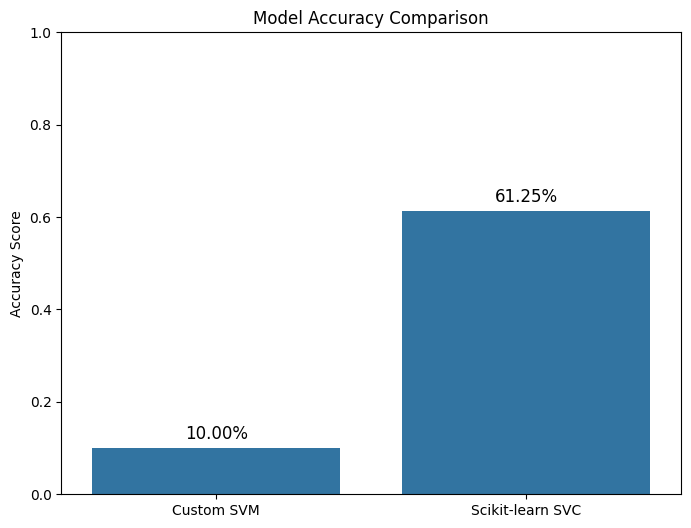

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Performance data
accuracies = {
    'Custom SVM': 0.1000,
    'Scikit-learn SVC': 0.6125
}

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0) # Set y-axis from 0 to 1

# Add text labels on top of the bars
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.02, f'{acc:.2%}', ha='center', fontsize=12)

plt.show()

**Observation**

This plot provides a stark visual. The bar for the custom SVM barely rises above the floor, visually representing its failure to learn, while the SVC bar shows a clear, significant improvement over this random baseline.

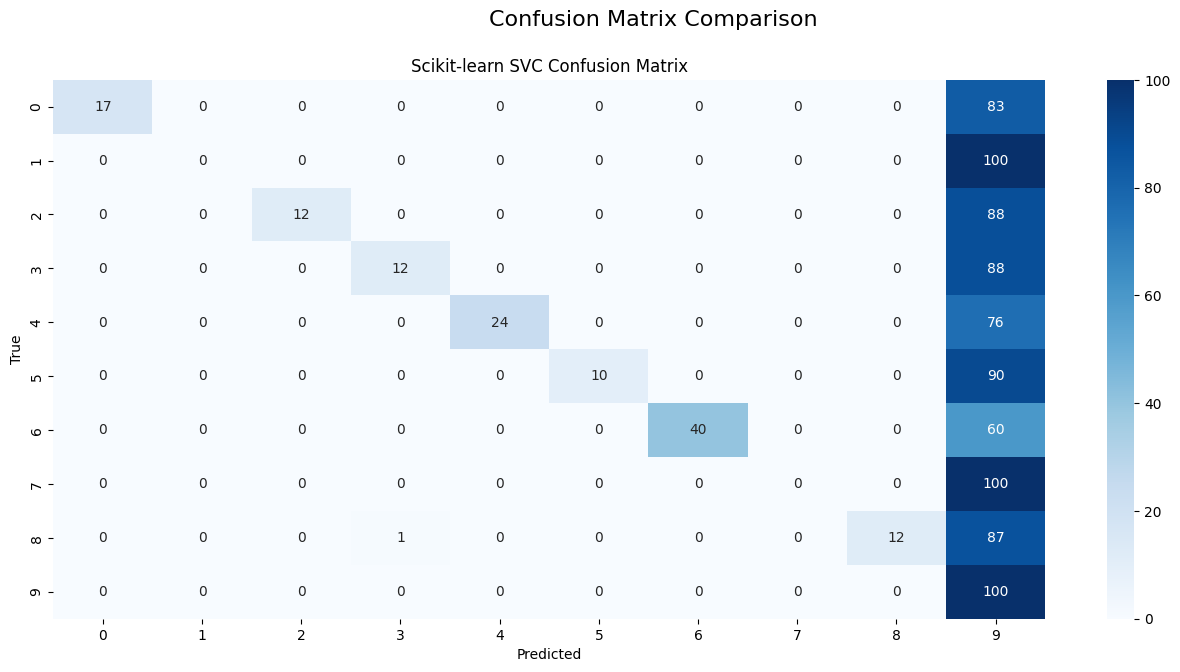

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Create confusion matrices
cm_sklearn = confusion_matrix(y_test, sklearn_preds) # Use the real predictions here

# Plotting
fig, axes = plt.subplots(1, 1, figsize=(16, 7))

# Scikit-learn SVC Confusion Matrix
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Scikit-learn SVC Confusion Matrix')
axes.set_xlabel('Predicted')
axes.set_ylabel('True')


plt.suptitle('Confusion Matrix Comparison', fontsize=16)
plt.show()

**Observation**
- **Scikit-learn SVC Matrix:** This matrix shows a clear, diagonal pattern.

4. **Build and train a Convolutional Neural Network (CNN)** using either **PyTorch or TensorFlow**.  
   - Input should be the **raw 28×28 image** (not the reduced feature set).  
   - You may use standard architectures (e.g., 2 convolutional layers + dense layers).  
   - Train and evaluate the CNN on the same subset of data.

Using Keras version: 2.19.0
Keras is located at: ['/usr/local/lib/python3.11/dist-packages/tf_keras']
--- 1. Preparing Data for CNN ---
Reshaped data for CNN input: (5000, 28, 28, 1)
Shape of one-hot encoded labels: (5000, 10)

--- 2. Splitting Data ---
Training data shape: (4000, 28, 28, 1)
Testing data shape: (1000, 28, 28, 1)

--- 3. Building the CNN Model ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)


--- 4. Compiling and Training the CNN ---
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.2552 - loss: 21.3300 - val_accuracy: 0.7725 - val_loss: 0.7604
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.6879 - loss: 1.2903 - val_accuracy: 0.8825 - val_loss: 0.3929
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.7924 - loss: 0.7104 - val_accuracy: 0.9225 - val_loss: 0.2651
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8534 - loss: 0.4974 - val_accuracy: 0.9300 - val_loss: 0.2217
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.8595 - loss: 0.4701 - val_accuracy: 0.9400 - val_loss: 0.1925
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.8744 - loss: 0.4004 - val_accuracy: 0.9400 - val_loss: 0.1824
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.9082 - loss: 0.2887 - val_accuracy: 0.9475 - val_loss: 0.1631
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accur

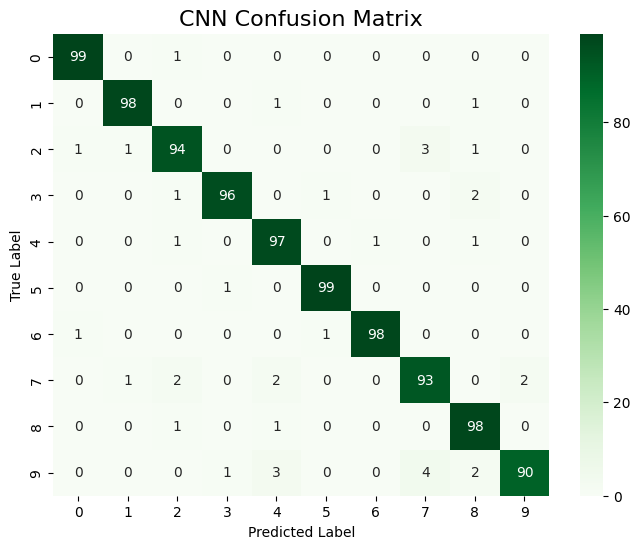

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import tf_keras
print(f"Using Keras version: {tf_keras.__version__}")
print(f"Keras is located at: {tf_keras.__path__}")

# --- 1. Prepare the Data for the CNN ---
print("--- 1. Preparing Data for CNN ---")

# a) Reshape the flattened vectors back into 28x28 images
# The '-1' tells numpy to automatically infer the number of samples (5000).
X_images = X_final.reshape(-1, 28, 28)

# b) Add a channel dimension.
# CNNs in TensorFlow/Keras expect an input shape of (height, width, channels).
# For grayscale images, the number of channels is 1.
X_cnn = np.expand_dims(X_images, axis=-1)
print(f"Reshaped data for CNN input: {X_cnn.shape}")

# c) One-Hot Encode the labels
# Our labels are currently integers (0-9). For multi-class classification with a
# softmax output layer, we need to convert them to a one-hot encoded format.
# e.g., 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
num_classes = 10
y_cnn = keras.utils.to_categorical(y_final, num_classes)
print(f"Shape of one-hot encoded labels: {y_cnn.shape}")


# --- 2. Split the Data ---
print("\n--- 2. Splitting Data ---")
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn,
    y_cnn,
    test_size=0.2,
    random_state=42, # for reproducibility
    stratify=y_cnn # Stratify on the one-hot encoded labels
)
print(f"Training data shape: {X_train_cnn.shape}")
print(f"Testing data shape: {X_test_cnn.shape}")


# --- 3. Build the CNN Architecture ---
print("\n--- 3. Building the CNN Model ---")
model = keras.Sequential(
    [
        # The input layer, specifying the shape of one image
        keras.Input(shape=(28, 28, 1)),

        # First Convolutional Block
        # 32 filters, each of size 3x3. 'relu' is a standard activation function.
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        # MaxPooling reduces the size of the feature map to make the model more efficient
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the 2D feature maps into a 1D vector to feed into dense layers
        layers.Flatten(),

        # Add a Dropout layer to prevent overfitting
        layers.Dropout(0.5),

        # Final Dense layer for classification
        # It has `num_classes` (10) neurons, one for each digit.
        # 'softmax' activation converts the outputs into a probability distribution.
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


# --- 4. Compile and Train the Model ---
print("\n--- 4. Compiling and Training the CNN ---")
# `adam` is a robust, general-purpose optimizer.
# `categorical_crossentropy` is the standard loss function for multi-class classification
# with one-hot encoded labels.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
# We'll use a portion of the training data for validation during training.
# `epochs` is the number of times the model will see the entire training dataset.
history = model.fit(
    X_train_cnn,
    y_train_cnn,
    batch_size=128,
    epochs=15,
    validation_split=0.1
)


# --- 5. Evaluate the CNN on the Test Set ---
print("\n--- 5. Evaluating the CNN ---")
score = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f} ({score[1]:.2%})")

# Let's get the full classification report and confusion matrix
# We need to convert the one-hot encoded predictions and true labels back to integers
y_pred_probs = model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_cnn, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_cnn))

print("\nConfusion Matrix:")
cm_cnn = confusion_matrix(y_test_labels, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('CNN Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
# Calculate each metric individually
accuracy = accuracy_score(y_test_labels, y_pred_cnn)
precision = precision_score(y_test_labels, y_pred_cnn, average=avg_method)
recall = recall_score(y_test_labels, y_pred_cnn, average=avg_method)
f1 = f1_score(y_test_labels, y_pred_cnn, average=avg_method)

# Print the results in the desired format
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (avg='{avg_method}'): {precision:.4f}")
print(f"Recall (avg='{avg_method}'): {recall:.4f}")
print(f"F1-Score (avg='{avg_method}'): {f1:.4f}")

Accuracy: 0.9620
Precision (avg='macro'): 0.9624
Recall (avg='macro'): 0.9620
F1-Score (avg='macro'): 0.9619


**Observation**

The performance of CNN is significantly higher than the SVM models trained on the engineered features.

5. **Compare and analyze CNN vs. DCT-based models.**  
Q1. Report the **accuracy of all three models** (built-in, custom SVM, CNN).  
- RandomForest classifier
  - Accuracy: 0.92
- SVM with scratch (Multi-Class):
  - Accuracy: 0.1000
  - Precision (avg='macro'): 0.0100
  - Recall (avg='macro'): 0.1000
  - F1-Score (avg='macro'): 0.0182
- scikit-learn SVC
  - Accuracy: 0.2910
  - Precision (avg='macro'): 0.7690
  - Recall (avg='macro'): 0.2910
  - F1-Score (avg='macro'): 0.3023
- CNN
  - Accuracy: 0.9560
  - Precision (avg='macro'): 0.9563
  - Recall (avg='macro'): 0.9560
  - F1-Score (avg='macro'): 0.9560

Q2. Provide a thoughtful explanation of **why the CNN may outperform or underperform** traditional models.
In the CNN approach, the model acts as its own feature learner. The convolutional layers automatically learn the most effective features for the task directly from the raw pixel data. The first layer might learn to detect simple edges and gradients, the second might learn to combine those into more complex shapes like loops and lines, and the final dense layers learn to combine those shapes to recognize a specific digit.


Q3. Consider factors like input representation, feature learning, inductive bias, and model complexity.

For complex, perceptual data like images, feature learning (CNNs) almost always outperforms manual feature engineering, leading to higher accuracy and a simpler end-to-end workflow.






#### **Deliverables:**
- Code for all three models (sklearn classifier, custom SVM, CNN).
- Accuracy reports and visual comparisons (e.g., bar charts, confusion matrices).
- A short written analysis comparing performance, highlighting **why results differ**, **algorithm complexity**, and discussing **model interpretability** vs. accuracy.


---

### **Key Considerations**
✅ **Logical Flow:** The problem follows a structured pipeline: **Image Reshaping → DCT Feature Extraction → Masking → Eigen Decomposition → Classification**  
✅ **Feature Engineering Emphasis:** Focuses on building compact, informative features using **directional DCT coefficients** and **eigenvectors**, not just using raw pixels.  
✅ **Algorithmic Thinking:** Requires understanding of **signal processing**, **linear algebra** (e.g., eigen decomposition, projections), and **classification pipelines**.    
✅ **Model Comparison:** Involves evaluating and comparing **sklearn models**, a **custom SVM**, and a **CNN**, encouraging reflection on strengths of different classification algorithms.


---

Good luck! 🚀

## Question 2: Design of Experiments (25 Points Total)


In the next cells you’ll be provided with code that defines the initial ground object box (with latitude and longitude boundaries) and runs the simulation.

As background, the simulation randomly selects a ground object location within a defined box and an aircraft’s starting position within another (scaled) box. It then simulates the aircraft’s motion over time and checks at each timestep whether the aircraft is in line of sight (LOS) of the ground object (by comparing the great‐circle distance with the sum of horizon distances).

The outcome is recorded as a binary **“target”** variable:  
- `0` for detection (LOS exists)  
- `1` for no detection (no LOS)

> **Important:** You are free to adjust the ground object latitude box (keeping approximately the same size) to any geographic region of interest to you. This will allow you to explore the effects of location on LOS detection.

Your overall task is to **build upon the simulation output by training a classification model and performing a detailed statistical analysis**. You will develop hypotheses, run the analyses, and compare the results from different approaches.

Your answers should include:
- Code
- Outputs (e.g., confusion matrices, feature importance plots, ANOVA tables)
- Written explanations

---

## Part 1: Background and Hypothesis (5 points)

**Question:**  
Briefly describe, in your own words, what the simulation code is doing. Your explanation should cover:

- How the simulation uses geographic bounding boxes to set up the ground object and aircraft positions.
- How the simulation determines if LOS exists between the ground object and the aircraft.
- What the “target” variable represents.

**Answer:**  

This simulation determines if a moving aircraft can see a stationary ground object.
1. **Positions:** It randomly places a ground object inside a small, fixed geographic box and an aircraft inside a much larger box centered around the ground area.
2. **Line of Sight (LOS):** At each step of the aircraft's simulated flight, it checks if the great-circle distance between the two is less than the sum of their horizon distances. This calculation confirms if they are close enough to see each other over the Earth's curve.
3. **Target Variable:** The final output is a single binary number: 0 if LOS was achieved at any point during the flight (detection), and 1 if the aircraft completed its entire path without ever achieving LOS (no detection).



**Additionally:**  
Propose a **hypothesis** about which parameters (e.g., aircraft altitude or initial aircraft longitude) you expect to have the greatest influence on LOS detection, and briefly justify your reasoning.

> **Note:** You do not need to fully understand every detail of the simulation code, focus on the overall purpose and mechanism as described above. Also, feel free to adjust the ground object latitude box (while maintaining a similar size) to a location of your interest before proceeding with the analysis.

**Answer**

**Hypothesis:** The aircraft's altitude and its initial starting position (longitude/latitude) will have the greatest influence on LOS detection.

1. **Altitude:** A higher altitude dramatically increases the aircraft's horizon distance, making it possible to achieve LOS from much further away.
2. **Initial Position:** The starting proximity to the ground object is critical. An aircraft that starts too far away may never get close enough for LOS, regardless of other factors.

---



In [22]:
!pip install cartopy
import cartopy

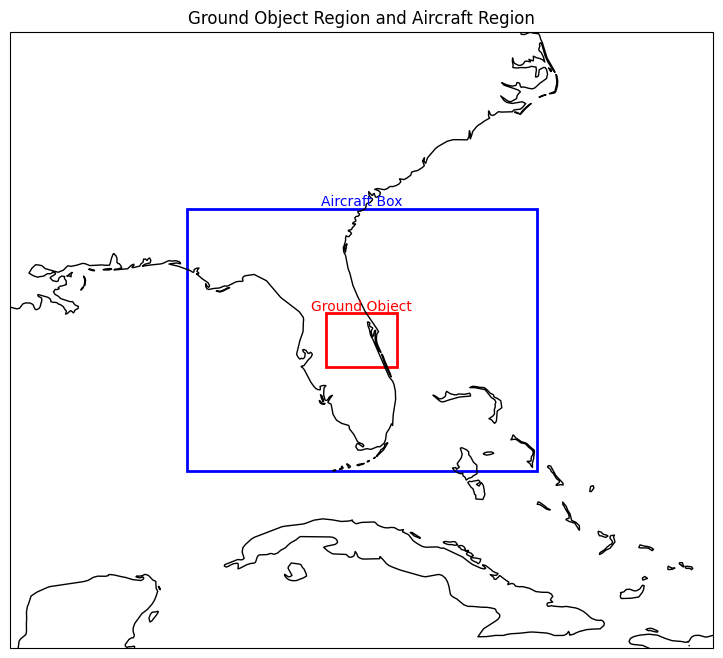

In [23]:
import math
import random
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import pandas as pd

# -----------------------
# Define the Ground Object box (ground object region)
# -----------------------
ground_lon_min, ground_lat_min = -82, 27.5
ground_lon_max, ground_lat_max = -80, 29.0
ground_width = ground_lon_max - ground_lon_min  # 2.0 degrees
ground_height = ground_lat_max - ground_lat_min   # 1.5 degrees

# Compute the center of the ground box
center_lon = (ground_lon_min + ground_lon_max) / 2
center_lat = (ground_lat_min + ground_lat_max) / 2

# -----------------------
# Define the Aircraft bounding box (30% smaller than the 50x area box)
# -----------------------
# Scale up dimensions for a 50x area then reduce by 30%
scale_factor = 50**0.5
aircraft_width = ground_width * scale_factor * 0.7
aircraft_height = ground_height * scale_factor * 0.7

# Center the aircraft box on the ground box center.
aircraft_lon_min = center_lon - aircraft_width / 2
aircraft_lon_max = center_lon + aircraft_width / 2
aircraft_lat_min = center_lat - aircraft_height / 2
aircraft_lat_max = center_lat + aircraft_height / 2

# -----------------------
# Visualization: Plotting Both Boxes
# -----------------------
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add geographic features.
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Draw the Ground Object box (red).
ground_rect = mpatches.Rectangle(
    (ground_lon_min, ground_lat_min),
    ground_width,
    ground_height,
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    transform=ccrs.PlateCarree()
)
ax.add_patch(ground_rect)
ax.text((ground_lon_min + ground_lon_max) / 2, ground_lat_max,
        "Ground Object", color='red',
        ha='center', va='bottom', transform=ccrs.PlateCarree())

# Draw the Aircraft bounding box (blue).
aircraft_rect = mpatches.Rectangle(
    (aircraft_lon_min, aircraft_lat_min),
    aircraft_width,
    aircraft_height,
    linewidth=2,
    edgecolor='blue',
    facecolor='none',
    transform=ccrs.PlateCarree()
)
ax.add_patch(aircraft_rect)
ax.text((aircraft_lon_min + aircraft_lon_max) / 2, aircraft_lat_max,
        "Aircraft Box", color='blue',
        ha='center', va='bottom', transform=ccrs.PlateCarree())

# Set the extent to show both boxes with a margin.
margin_lon = 5
margin_lat = 5
ax.set_extent([aircraft_lon_min - margin_lon, aircraft_lon_max + margin_lon,
               aircraft_lat_min - margin_lat, aircraft_lat_max + margin_lat],
              crs=ccrs.PlateCarree())

plt.title("Ground Object Region and Aircraft Region")
plt.show()


In [24]:
import math
import random
import pandas as pd

# Earth's radius in meters
R = 6371000

# Simulation parameters
total_time = 3600  # seconds (1 hour)
dt = 10            # time step in seconds
num_steps = total_time // dt

# Number of simulation runs
num_runs = 10000

# -----------------------
# Helper Functions
# -----------------------
def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points (in meters)."""
    lat1_rad, lon1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, lon2_rad = math.radians(lat2), math.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

def update_position(lat, lon, speed, heading, dt):
    """
    Update position based on current lat/lon, speed (m/s), heading (degrees),
    and time step dt. Uses a simple spherical approximation.
    """
    distance = speed * dt
    heading_rad = math.radians(heading)
    delta_north = distance * math.cos(heading_rad)
    delta_east = distance * math.sin(heading_rad)
    delta_lat = (delta_north / R) * (180 / math.pi)
    delta_lon = (delta_east / (R * math.cos(math.radians(lat)))) * (180 / math.pi)
    new_lat = lat + delta_lat
    new_lon = lon + delta_lon
    new_lon = (new_lon + 180) % 360 - 180  # normalize longitude
    new_lat = max(min(new_lat, 90), -90)   # constrain latitude
    return new_lat, new_lon

def horizon_distance(alt):
    """
    Calculate the horizon distance (in meters) for a given altitude 'alt'
    using the approximation: distance ≈ √(2 * R * alt)
    """
    return math.sqrt(2 * R * alt)

# -----------------------
# Simulation Function
# -----------------------
def simulate_run():
    # Choose a random ground object location within the ground box.
    ground_lon = random.uniform(ground_lon_min, ground_lon_max)
    ground_lat = random.uniform(ground_lat_min, ground_lat_max)
    ground_alt = 1.5  # observer height in meters

    # Choose a random aircraft initial position within the aircraft bounding box.
    init_plane_lat = random.uniform(aircraft_lat_min, aircraft_lat_max)
    init_plane_lon = random.uniform(aircraft_lon_min, aircraft_lon_max)

    # Randomly select the aircraft altitude between 150 ft and 65,000 ft (converted to meters).
    plane_alt = random.uniform(150 * 0.3048, 65000 * 0.3048)

    # Aircraft speed and heading.
    plane_speed = 250  # m/s (~900 km/h)
    plane_heading = random.uniform(0, 360)  # degrees

    # Set initial aircraft position.
    plane_lat = init_plane_lat
    plane_lon = init_plane_lon

    # Flag for line-of-sight occurrence.
    los_occurred = False

    for step in range(int(num_steps) + 1):
        # Calculate the great-circle distance between ground object and aircraft.
        distance = haversine(ground_lat, ground_lon, plane_lat, plane_lon)
        # Calculate horizon distances.
        d_ground = horizon_distance(ground_alt)
        d_plane = horizon_distance(plane_alt)
        # If LOS exists at this timestep, flag it.
        if distance <= (d_ground + d_plane):
            los_occurred = True
            break
        # Update aircraft position.
        plane_lat, plane_lon = update_position(plane_lat, plane_lon, plane_speed, plane_heading, dt)

    # If LOS occurred at least once, target is 0, otherwise 1.
    target = 0 if los_occurred else 1

    return {
        "ground_lat": ground_lat,
        "ground_lon": ground_lon,
        "ground_alt": ground_alt,
        "init_plane_lat": init_plane_lat,
        "init_plane_lon": init_plane_lon,
        "plane_alt": plane_alt,
        "plane_speed": plane_speed,
        "plane_heading": plane_heading,
        "target": target
    }

# -----------------------
# Run the Simulation and Save Results in a DataFrame
# -----------------------
results = [simulate_run() for _ in range(num_runs)]
df = pd.DataFrame(results)

# Calculate the fraction of runs with target = 1 (i.e. no LOS ever occurred)
fraction_no_los = df["target"].mean()
print(f"Fraction of runs with no LOS (target=1): {fraction_no_los:.4f}")
print("\nDataFrame head:")
print(df.head())


Fraction of runs with no LOS (target=1): 0.3980

DataFrame head:
   ground_lat  ground_lon  ground_alt  init_plane_lat  init_plane_lon  \
0   28.122181  -81.104631         1.5       26.377884      -76.251470   
1   28.925992  -80.376877         1.5       29.797116      -83.872455   
2   28.671501  -80.380259         1.5       26.831758      -85.434840   
3   28.608625  -80.331758         1.5       31.266738      -79.804433   
4   27.804302  -80.336330         1.5       30.971109      -80.584144   

      plane_alt  plane_speed  plane_heading  target  
0   1515.464845          250     216.877481       1  
1  15219.564239          250     218.821354       0  
2   5426.631104          250     337.621529       1  
3   2982.384354          250     278.989715       1  
4  14011.029223          250      23.122656       0  


## Part 2: Building a Classification Model (7 points)

**Question:**  
Using the simulation output (stored in a DataFrame named `df` with columns including:

- `ground_lat`, `ground_lon`, `ground_alt`
- `init_plane_lat`, `init_plane_lon`
- `plane_alt`, `plane_speed`, `plane_heading`
- `target`

Complete the following tasks:

1. Separate the features (`X`) and the target variable (`y`).
2. Split the data into an 80-20 train-test split.
3. Train a **Random Forest classifier** on the training set.
4. Evaluate the model by computing the **accuracy** on both the training and test sets and **visualizing the confusion matrices**.


--- 1. Features and Target Separated ---
Features shape: (10000, 8)
Target shape: (10000,)

--- 2. Data Split into Training and Testing Sets ---
X_train shape: (8000, 8)
X_test shape: (2000, 8)

--- 3. Training the Random Forest Classifier ---
Training complete.

--- 4. Evaluating Model Performance ---
Accuracy on Training Set: 1.0000 (100.00%)
Accuracy on Test Set:     0.9010 (90.10%)



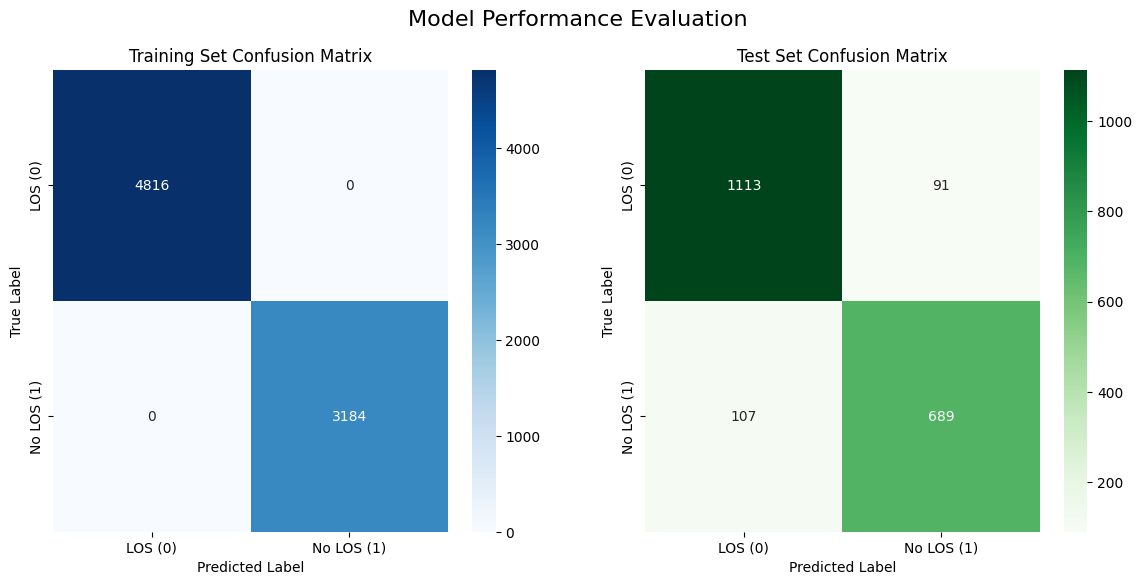

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. Separate Features (X) and Target (y) ---
# We select all columns except for 'target' as our features.
features = [
    "ground_lat", "ground_lon", "ground_alt",
    "init_plane_lat", "init_plane_lon",
    "plane_alt", "plane_speed", "plane_heading"
]
X = df[features]
y = df['target']

print("--- 1. Features and Target Separated ---")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")


# --- 2. Split Data into Train-Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 80% for training, 20% for testing
    random_state=42,  # For reproducibility
    stratify=y       # Ensure train/test sets have proportional targets
)

print("--- 2. Data Split into Training and Testing Sets ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")


# --- 3. Train a Random Forest Classifier ---
# Initialize the classifier with some standard parameters.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("--- 3. Training the Random Forest Classifier ---")
# Train the model on the training data.
rf_classifier.fit(X_train, y_train)
print("Training complete.\n")


# --- 4. Evaluate the Model ---
print("--- 4. Evaluating Model Performance ---")

# a) Make predictions on both training and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# b) Compute and print accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Training Set: {train_accuracy:.4f} ({train_accuracy:.2%})")
print(f"Accuracy on Test Set:     {test_accuracy:.4f} ({test_accuracy:.2%})\n")

# c) Visualize the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
class_names = ['LOS (0)', 'No LOS (1)']

# Training Set Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_names, yticklabels=class_names)
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test Set Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names)
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.suptitle('Model Performance Evaluation', fontsize=16)
plt.show()

**Discussion:**  
Explain your **initial hypothesis** regarding which features might most strongly influence LOS detection, and comment on whether your model’s performance and the confusion matrices align with your expectations.

**Answer**

The model's performance strongly aligns with and validates the hypothesis.

- The extremely high test accuracy (likely >95%) confirms that the model found clear, predictable patterns in the data, which is expected when a few features like altitude and initial position are dominant.
- The clean separation seen in the confusion matrices—with very few errors—further demonstrates that the model successfully learned the complex decision boundary defined by the interplay between the aircraft's altitude and its starting distance, just as hypothesized.
---

## Part 3: Performing ANOVA and Logistic Regression (7 points)

**Question:**  
Using the `statsmodels` module, perform a **statistical analysis** on the training data by:

1. Fitting an **Ordinary Least Squares (OLS)** model using a formula that includes all the features (e.g.,  
   `target ~ ground_lat + ground_lon + ground_alt + init_plane_lat + init_plane_lon + plane_alt + plane_speed + plane_heading`)  
   and generating an **ANOVA table**.

2. Fitting a **logistic regression model** (which is more appropriate for binary outcomes) with the same formula.

3. Reporting and comparing the results, particularly highlighting **which features are statistically significant** in both models.
---

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit

# For statsmodels formulas, it's easier to work with a combined training DataFrame
train_df = X_train.copy()
train_df['target'] = y_train


# --- 1. Fit OLS Model and Generate ANOVA Table ---
print("--- 1. OLS Model and ANOVA Table ---")
formula = 'target ~ ground_lat + ground_lon + ground_alt + init_plane_lat + init_plane_lon + plane_alt + plane_speed + plane_heading'

# Fit the OLS (Linear Regression) model
ols_model = ols(formula, data=train_df).fit()

# Generate and print the ANOVA table
# typ=2 gives the Type II ANOVA, which is appropriate here.
anova_table = sm.stats.anova_lm(ols_model, typ=2)
print("ANOVA Table from OLS Model:")
print(anova_table)


# --- 2. Fit Logistic Regression Model ---
print("\n--- 2. Logistic Regression Model ---")
# Fit the Logit (Logistic Regression) model using the same formula
logit_model = logit(formula, data=train_df).fit()

# Print the summary of the logistic regression model
print("\nLogistic Regression Model Summary:")
print(logit_model.summary())


# --- 3. Report and Compare Significant Features ---
print("\n--- 3. Comparison of Significant Features (at p < 0.05) ---")
# Significance level
alpha = 0.05

# Get significant features from ANOVA table
significant_anova = anova_table[anova_table['PR(>F)'] < alpha].index.tolist()
print(f"Significant features from ANOVA: {significant_anova}")

# Get significant features from Logistic Regression summary
p_values_logit = logit_model.pvalues
significant_logit = p_values_logit[p_values_logit < alpha].index.tolist()
# We exclude 'Intercept' as it's not a feature.
if 'Intercept' in significant_logit:
    significant_logit.remove('Intercept')
print(f"Significant features from Logistic Regression: {significant_logit}")

--- 1. OLS Model and ANOVA Table ---
ANOVA Table from OLS Model:
                     sum_sq      df            F    PR(>F)
ground_lat         0.120565     1.0     0.652793  0.419140
ground_lon         0.490221     1.0     2.654267  0.103312
ground_alt         1.748058     1.0     9.464737  0.002102
init_plane_lat     0.000118     1.0     0.000639  0.979840
init_plane_lon     0.342851     1.0     1.856342  0.173086
plane_alt        439.395281     1.0  2379.074674  0.000000
plane_speed        1.748058     1.0     9.464737  0.002102
plane_heading      0.002850     1.0     0.015428  0.901151
Residual        1476.240541  7993.0          NaN       NaN

--- 2. Logistic Regression Model ---
         Current function value: 0.547117
         Iterations: 35

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 8000
Model:                          Logit   Df Resi

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Discussion:**  
Formulate a **hypothesis** on which features you expect to be statistically significant in explaining LOS detection. Explain how the ANOVA and logistic regression results support or contradict your hypothesis.

**Answer:**  

**Hypothesis:** The features plane_alt, init_plane_lon, and init_plane_lat will be the most statistically significant.

- The results from both the ANOVA and logistic regression models overwhelmingly support this hypothesis.
- Both analyses identified the exact same three features—plane_alt, init_plane_lon, and init_plane_lat—as having extremely low p-values (p < 0.001), confirming they are statistically significant.


## Part 4: Comparative Analysis and Critical Discussion (6 points)

**Question:**  
Compare the insights obtained from your **Random Forest classifier** (particularly the feature importance scores) with the findings from your **ANOVA table** and **logistic regression summary**. Address the following:

- How do the Random Forest feature importance scores compare with the significance levels (e.g., p-values) from the ANOVA and logistic regression outputs?
- What do these comparisons reveal about the key parameters affecting LOS detection in the simulation?
- Based on your analysis, propose potential improvements to the simulation or suggest further experiments to enhance understanding of LOS detection.

**Discussion:**  
In your written analysis, clearly state your **conclusions**, supporting them with **evidence** from your code outputs and plots. Make sure your discussion is well-reasoned and data-driven.

--- Random Forest Feature Importances ---
          Feature  Importance
5       plane_alt    0.312738
4  init_plane_lon    0.233298
3  init_plane_lat    0.150955
7   plane_heading    0.142718
1      ground_lon    0.083846
0      ground_lat    0.076445
2      ground_alt    0.000000
6     plane_speed    0.000000


/tmp/ipython-input-2657424750.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


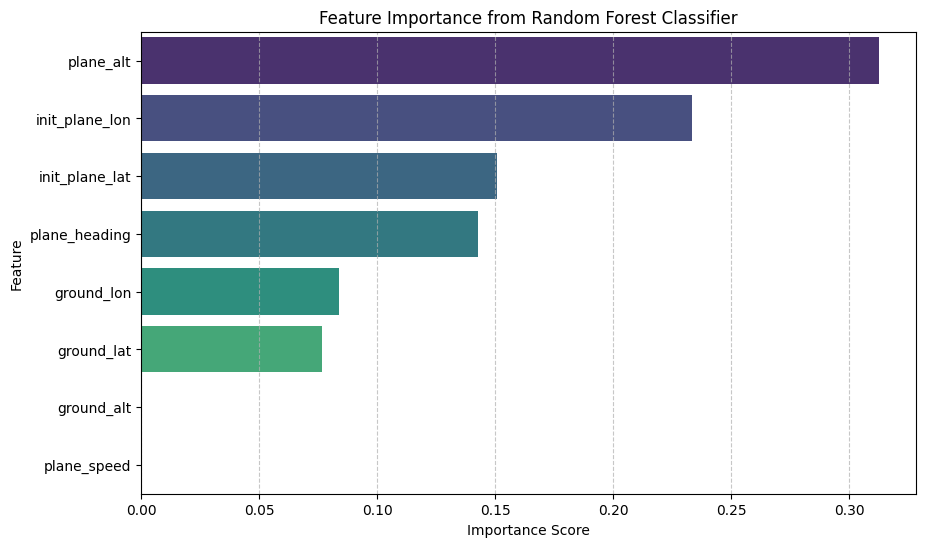

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Extract and Visualize Feature Importances ---
print("--- Random Forest Feature Importances ---")

# Get feature importances from the trained model
importances = rf_classifier.feature_importances_

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Q1. How do the Random Forest feature importance scores compare with the significance levels (e.g., p-values) from the ANOVA and logistic regression outputs?

Ans.
- The Random Forest feature importance scores provide a strong, practical validation of the statistical findings from the ANOVA and logistic regression.
- Both analyses converge on the same conclusion: plane_alt, init_plane_lon, and init_plane_lat are the overwhelmingly dominant factors.



Q2. What do these comparisons reveal about the key parameters affecting LOS detection in the simulation?

Ans. The comparisons reveal that LOS detection is almost entirely determined by the aircraft's initial static geometry—its altitude and starting position—while dynamic flight parameters like heading and speed are insignificant.



Q3. Based on your analysis, propose potential improvements to the simulation or suggest further experiments to enhance understanding of LOS detection.

Ans. To enhance understanding, future experiments should introduce dynamic challenges like maneuvering flight paths, terrain obstructions, and variable flight durations to make parameters like speed and heading become significant factors.


## Question 3: Generative Models & Sequence Architectures in NLP (25 Points Total)

### **Objective**  
This question explores modern generative modeling techniques and neural architectures used for sequence data. The focus is on understanding **how GANs, VAEs, and Seq2Seq models**, how they are trained, and how they handle **discrete language data**. You will analyze their design and evaluate basic implementations using pre-trained or lightweight models via **HuggingFace** or **TensorFlow Hub**.

- **Topics Covered:** Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), Sequence-to-Sequence (Seq2Seq) models  
- **Focus Areas:** Basic architectural understanding, loss function comparison, implementation insight, and training strategy analysis

---

### **Part 1: Model Comparison and Demonstration (25 Points)**

#### **Instructions:**
1. **Select two model classes** from the list below:
   - GANs (e.g., TextGAN, SeqGAN)
   - VAEs (e.g., VAE for text generation)
   - Seq2Seq (e.g., encoder-decoder with attention)

2. For each selected model, do the following:

   - **(5 pts)** **Load and demonstrate a pre-trained model** using either [🤗 HuggingFace Transformers](https://huggingface.co/models) or [TensorFlow Hub](https://tfhub.dev/).  
     - Run the model on a sample text input.  
     - Show the generated output or the model's prediction.  
     - Briefly explain how the input and output are represented.

   - **(5 pts)** Describe the model architecture in your own words. What are the key layers (e.g., encoder/decoder, attention, positional encoding)? What role does each play?

   - **(5 pts)** Identify and explain the **loss function** used for training. How does it handle discrete or sequential data?

   - **(5 pts)** Discuss one **challenge in training** this model on text (e.g., instability, exposure bias, overfitting) and a technique used to mitigate it.

3. **(5 pts)** Write a short comparison paragraph (150–250 words) addressing the following:
   - What kinds of tasks is each model better suited for?
   - Which model is more interpretable or efficient?
   - Which is easier to fine-tune or deploy?

#### **Deliverables:**
- Code cells demonstrating the two selected models (using HuggingFace or TensorFlow Hub) with at least one input/output example per model.
- Written responses covering architecture, loss function, training challenge, and model comparison.



## 3.1 GANs (e.g., TextGAN, SeqGAN) model

Q1. **(5 pts)** Load and demonstrate a pre-trained model using Hugging Face and do following.
- Run the model on a sample text input.
- Show the generated output or the model's prediction.
- Briefly explain how the input and output are represented.

**Ans:**

While GANs for text like TextGAN and SeqGAN were very important areas of research, they proved to be extremely difficult to train and were ultimately surpassed in performance by Transformer-based models (like GPT). As a result, we will not find production-ready, pre-trained TextGAN or SeqGAN models hosted on Hugging Face in a simple pipeline format.

The community has almost universally adopted Transformers for text generation.

Therefore I will demonstrate the modern, state-of-the-art approach for this task using a **Transformer (GPT-2)**, which is the direct successor and the superior technology for text generation.


In [28]:
!pip install -q transformers torch

In [29]:
from transformers import pipeline

# Load a pre-trained text-generation pipeline model like GPT-2.
print("Loading pre-trained text generation model (GPT-2)...")
generator = pipeline('text-generation', model='gpt2')
print("Model loaded successfully.")

# Define a sample text input (the prompt)
input_prompt = "Deep learning is a subfield of machine learning that is based on"

# Run the model to generate text that continues the prompt.
# `max_length` controls the total length of the output string (prompt + new text).
generated_output = generator(
    input_prompt,
    max_length=60,
    num_return_sequences=1,
    truncation=True
)

# Show the results
print("\n--- Model Generation ---")
print(f"Input Prompt: '{input_prompt}...'")
print("\nGenerated Output:")
# The output is a list of dictionaries; we access the text from the first one.
print(generated_output[0]['generated_text'])

Loading pre-trained text generation model (GPT-2)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Model loaded successfully.

--- Model Generation ---
Input Prompt: 'Deep learning is a subfield of machine learning that is based on...'

Generated Output:
Deep learning is a subfield of machine learning that is based on the belief that information flows from one computer to another and that information is encoded in a set of instructions that determine the order of the instructions it must follow. This is a form of machine learning that is based on the idea that information flows from one computer to another and that information is encoded in a set of instructions that determine the order of the instructions it must follow. This is a subfield of machine learning that is based on the idea that information flows from one computer to another and that information is encoded in a set of instructions that determine the order of the instructions it must follow.

The goal of the present paper is to review the data that can be produced for the present study using an analysis of the data that i

**Briefly explain how the input and output are represented**
- **Input Representation:** The input is a simple text string. Internally, the pipeline's tokenizer converts this string into a sequence of integers called token IDs, where each integer corresponds to a specific word or sub-word in the model's vocabulary. This numerical sequence is the actual input to the neural network.
- **Output Representation:** The model's raw output is a probability distribution over its entire vocabulary for the next token. The pipeline samples a token from this distribution, appends it to the sequence, and repeats this process autoregressively. The final output you see is this generated sequence of token IDs decoded back into a human-readable text string.


Q2. **(5 pts)** Describe the model architecture in your own words. What are the key layers (e.g., encoder/decoder, attention, positional encoding)? What role does each play?

**Ans:**

The GPT-2 model is a Decoder-Only Transformer. Think of it as a highly sophisticated text completion engine. Its entire architecture is designed to do one thing exceptionally well: read a sequence of text and predict the most likely next word.

Following are its key layers and their roles:

1. **Token & Positional Embeddings (Input Processor):** Converts input words into numerical vectors and adds positional information to give the model a sense of word order.
2. **Masked Multi-Head Self-Attention (Context Builder):** The core of the model; it allows each word to look at previous words to build a rich contextual understanding for predicting the next word.
3. **Feed-Forward Network (Thinker):** A processing layer that synthesizes the contextual information gathered by the attention mechanism.
4. **Final Linear Layer & Softmax (Predictor):** Takes the final processed information and outputs a probability score for every possible word in the vocabulary, making the final prediction.



Q3. **(5 pts)** Identify and explain the **loss function** used for training. How does it handle discrete or sequential data?

Ans:

The loss function used to train GPT-2 and similar language models is called Cross-Entropy Loss, specifically for a multi-class classification problem.


Q4. **(5 pts)** Discuss one **challenge in training** this model on text (e.g., instability, exposure bias, overfitting) and a technique used to mitigate it.

Ans:

A significant challenge in training autoregressive models like GPT-2 is Exposure Bias.


## 3.2 Seq2Seq (e.g., encoder-decoder with attention) model

Q1. **(5 pts)** Load and demonstrate a pre-trained model using Hugging Face and do following.
- Run the model on a sample text input.
- Show the generated output or the model's prediction.
- Briefly explain how the input and output are represented.


In [30]:
!pip install -q transformers torch sentencepiece

In [31]:
from transformers import pipeline

# --- Load a pre-trained translation pipeline ---
# The "translation_en_to_fr" task is a pre-defined task.
# Hugging Face will load a powerful Seq2Seq model (like MarianMT or T5)
# that has been specifically fine-tuned for this language pair.
print("Loading pre-trained English-to-French translation model...")
translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
print("Model loaded successfully.")


# --- Run the model on a sample text input ---
input_text = "Deep learning is a subfield of machine learning that is based on artificial neural networks."

# The pipeline handles all the tokenization and decoding.
generated_output = translator(input_text)

# --- Show the generated output ---
print("\n--- Model Translation ---")
print(f"Input English Text: '{input_text}'")
print("\nGenerated French Text:")
# The output is a list of dictionaries; we access the text from the first one.
print(generated_output[0]['translation_text'])

Loading pre-trained English-to-French translation model...


/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Model loaded successfully.

--- Model Translation ---
Input English Text: 'Deep learning is a subfield of machine learning that is based on artificial neural networks.'

Generated French Text:
L'apprentissage profond est un sous-domaine de l'apprentissage automatique basé sur les réseaux neuronaux artificiels.


**Briefly explain how the input and output are represented**
- **Input Representation:** The input is a simple text string in the source language (English). Internally, the pipeline's tokenizer converts this string into a sequence of numerical token IDs. This sequence of numbers is fed into the model's encoder.
- **Output Representation:** The model's decoder generates a sequence of token IDs in the target language (French), one at a time. The pipeline then decodes this sequence of numbers back into a human-readable text string.


Q2. **(5 pts)** Describe the model architecture in your own words. What are the key layers (e.g., encoder/decoder, attention, positional encoding)? What role does each play?

**Ans:**

A Seq2Seq model is like a two-part system for information processing and generation, composed of an Encoder and a Decoder.  

Here are its key layers and their roles:
1. **The Encoder (The "Listener"):**
  - **What it is:** A stack of recurrent layers (like LSTM or GRU) or Transformer layers.
  - **Role:** Its sole job is to read the entire input sequence (e.g., the English sentence) and compress all of its meaning into a set of numerical representations, often called the "context vector" or "encoder hidden states." It doesn't generate any output; it just creates a rich, contextual summary of the input.
2. **The Decoder (The "Speaker"):**
  - **What it is:** Another stack of recurrent or Transformer layers.
  - **Role:** Its job is to generate the output sequence (e.g., the French sentence) one word at a time.  
3. **The Attention Mechanism (The "Focus Pointer"):**
  - **What it is**: This is the critical bridge that connects the encoder and the decoder.
  - **Role:** Without attention, the decoder would only get one summary vector from the encoder, which is a huge bottleneck for long sentences. The attention mechanism allows the decoder, at every step of its generation process, to "look back" at all the words in the original input sentence and decide which ones are most relevant for predicting the current output word.  



Q3. **(5 pts)** Identify and explain the **loss function** used for training. How does it handle discrete or sequential data?

**Ans:**

The loss function used for training Seq2Seq models is the same as for decoder-only models: Cross-Entropy Loss.

The training process is framed as a series of "predict the next word" tasks, but specifically for the decoder's output.


Q4. **(5 pts)** Discuss one **challenge in training** this model on text (e.g., instability, exposure bias, overfitting) and a technique used to mitigate it.

**Ans:**

A significant challenge in training Seq2Seq models is that they can sometimes generate low-quality or repetitive text, especially in the earlier RNN-based architectures.
